In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [44]:
def read_raw_data():
    import pandas as pd
    """
    Summary: Read 4 files df_survivalists.csv, df_loadouts.csv, episodes.csv and 
    seasons.csv into separate data frames
    parameters: None
    Return: 4 Dataframes of each file
    """
    df_survivalists = pd.read_csv(r"survivalists.csv")
    df_loadouts = pd.read_csv(r"loadouts.csv")
    df_episodes = pd.read_csv(r"episodes.csv")
    df_seasons = pd.read_csv(r"seasons.csv")
   
    return df_survivalists, df_loadouts, df_episodes, df_seasons

df_survivalists, df_loadouts, df_episodes, df_seasons = read_raw_data()

In [45]:
df_survivalists.head()

,season,name,age,gender,city,state,country,result,days_lasted,medically_evacuated,reason_tapped_out,reason_category,team,day_linked_up,profession,url
0,1,Alan Kay,40,Male,Blairsville,Georgia,United States,1,56,False,NaN,NaN,NaN,NaN,Corrections Officer,alan-kay
1,1,Sam Larson,22,Male,Lincoln,Nebraska,United States,2,55,False,Lost the mind game,Family / personal,NaN,NaN,Outdoor Gear Retailer,sam-larson
2,1,Mitch Mitchell,34,Male,Bellingham,Massachusetts,United States,3,43,False,Realized he should actually be around for his ...,Family / personal,NaN,NaN,Butcher,mitch-mitchell
3,1,Lucas Miller,32,Male,Quasqueton,Iowa,United States,4,39,False,Felt content with what he had done,Family / personal,NaN,NaN,Survivalist and Wildlife Therapist/Natural Hea...,lucas-miller
4,1,Dustin Feher,37,Male,Pittsburgh,Pennsylvania,United States,5,8,False,Fear of storm,Family / personal,NaN,NaN,Carpenter,dustin-feher


In [46]:
df_loadouts.head()

,version,season,name,item_number,item_detailed,item
0,US,1,Alan Kay,1,Saw,Saw
1,US,1,Alan Kay,2,Axe,Axe
2,US,1,Alan Kay,3,Sleeping bag,Sleeping bag
3,US,1,Alan Kay,4,Large 2-quart pot,Pot
4,US,1,Alan Kay,5,Ferro rod,Ferro rod


In [47]:
df_seasons

,version,season,location,country,n_survivors,lat,lon,date_drop_off
0,US,1,Quatsino,Canada,10,50.724440,-127.498056,NaN
1,US,2,Quatsino,Canada,10,50.724440,-127.498056,NaN
2,US,3,Patagonia,Argentina,10,-41.000000,-68.000000,NaN
3,US,4,Quatsino,Canada,14,50.724440,-127.498056,NaN
4,US,5,Selenge Province,Mongolia,10,49.750000,106.500000,NaN
5,US,6,Great Slave Lake,Canada,10,61.500278,-114.001111,NaN
6,US,7,Great Slave Lake,Canada,10,61.500278,-114.001111,2019-09-18
7,US,8,Chilko Lake,Canada,10,51.266667,-124.050000,2020-09-18
8,US,9,Nunatsiavut,Canada,10,59.660000,-64.273611,2021-09-18


In [48]:
df_episodes.head()

,version,season,episode_number_overall,episode,title,air_date,viewers,quote,author,imdb_rating,n_ratings
0,US,1,1,1,And So It Begins,2015-06-18,1.582,I went to the woods because I wished to live d...,Henry David Thoreau,7.5,135.0
1,US,1,2,2,Of Wolf and Man,2015-06-25,1.697,If you live among wolves you have to act like ...,Nikita Khrushchev,7.7,110.0
2,US,1,3,3,The Talons of Fear,2015-07-02,1.864,Extinction is the rule. Survival is the except...,Carl Sagan,7.7,104.0
3,US,1,4,4,Stalked,2015-07-09,2.082,"Hunger, love, pain, fear are some of those inn...",Albert Einstein,7.7,104.0
4,US,1,5,5,Winds of Hell,2015-07-16,2.082,"The strong survive, but the courageous triumph.",Michael Scott,7.6,99.0


In [49]:
def clean_data(df_survivalists):
    # Drop column: 'reason_category'
    df_survivalists = df_survivalists.drop(columns=['reason_category'])
    # Drop column: 'team'
    df_survivalists = df_survivalists.drop(columns=['team'])
    # Drop column: 'day_linked_up'
    df_survivalists = df_survivalists.drop(columns=['day_linked_up'])
    # Drop column: 'url'
    df_survivalists = df_survivalists.drop(columns=['url'])
    # Replace missing values with "" in column: 'reason_tapped_out'
    df_survivalists = df_survivalists.fillna({'reason_tapped_out': ""})
    # Drop column: 'state'
    df_survivalists = df_survivalists.drop(columns=['state'])
    # Drop column: 'city'
    df_survivalists = df_survivalists.drop(columns=['city'])
    # Drop column: 'country'
    df_survivalists = df_survivalists.drop(columns=['country'])
    return df_survivalists

df_survivalists_clean = clean_data(df_survivalists.copy())
df_survivalists_clean.head()

,season,name,age,gender,result,days_lasted,medically_evacuated,reason_tapped_out,profession
0,1,Alan Kay,40,Male,1,56,False,,Corrections Officer
1,1,Sam Larson,22,Male,2,55,False,Lost the mind game,Outdoor Gear Retailer
2,1,Mitch Mitchell,34,Male,3,43,False,Realized he should actually be around for his ...,Butcher
3,1,Lucas Miller,32,Male,4,39,False,Felt content with what he had done,Survivalist and Wildlife Therapist/Natural Hea...
4,1,Dustin Feher,37,Male,5,8,False,Fear of storm,Carpenter


In [50]:
def clean_data(df_loadouts):
    # Drop column: 'version'
    df_loadouts = df_loadouts.drop(columns=['version'])
    return df_loadouts

df_loadouts_clean = clean_data(df_loadouts.copy())
df_loadouts_clean.head()

,season,name,item_number,item_detailed,item
0,1,Alan Kay,1,Saw,Saw
1,1,Alan Kay,2,Axe,Axe
2,1,Alan Kay,3,Sleeping bag,Sleeping bag
3,1,Alan Kay,4,Large 2-quart pot,Pot
4,1,Alan Kay,5,Ferro rod,Ferro rod


In [51]:
# Merge df_clean_survivalist with df_loadouts_clean to make a item x result analysis
df_armed = pd.merge(df_survivalists_clean, df_loadouts_clean, on=['name','season'] )
df_armed.head()

,season,name,age,gender,result,days_lasted,medically_evacuated,reason_tapped_out,profession,item_number,item_detailed,item
0,1,Alan Kay,40,Male,1,56,False,,Corrections Officer,1,Saw,Saw
1,1,Alan Kay,40,Male,1,56,False,,Corrections Officer,2,Axe,Axe
2,1,Alan Kay,40,Male,1,56,False,,Corrections Officer,3,Sleeping bag,Sleeping bag
3,1,Alan Kay,40,Male,1,56,False,,Corrections Officer,4,Large 2-quart pot,Pot
4,1,Alan Kay,40,Male,1,56,False,,Corrections Officer,5,Ferro rod,Ferro rod


In [52]:
# KPIs
average_duration = df_survivalists_clean['days_lasted'].mean()
median_duration = df_survivalists_clean['days_lasted'].median()
std_deviation = df_survivalists_clean['days_lasted'].std()

print('Average Duration: ', average_duration)
print('Median Duration: ', median_duration)
print('Standard Deviation of Survival Duration: ', std_deviation)

Average Duration:  39.04255319148936
Median Duration:  39.5
Standard Deviation of Survival Duration:  27.849408747847182


In [82]:
def calculate_survival_statistics(df, column_name):
    """
    Calculates and prints the average, median, and standard deviation 
    of survival duration for a given DataFrame.
    
    Parameters:
    - df: Pandas DataFrame containing the survival data.
    - column_name: String specifying the column in df to analyze.
    """
    average_duration = df[column_name].mean()
    median_duration = df[column_name].median()
    std_deviation = df[column_name].std()

    print('Average Duration:', average_duration)
    print('Median Duration:', median_duration)
    print('Standard Deviation of Survival Duration:', std_deviation)

calculate_survival_statistics(df_survivalists_clean, 'days_lasted')

Average Duration: 39.04255319148936
Median Duration: 39.5
Standard Deviation of Survival Duration: 27.849408747847182


In [55]:
# Longest survival per season
longest_survival_per_season = df_survivalists_clean.groupby('season')['days_lasted'].max()
longest_survival_per_season

season
1     56
2     66
3     87
4     75
5     60
6     77
7    100
8     74
9     78
Name: days_lasted, dtype: int64

In [56]:
# Calculating age vs. days lasted correlation
age_lasted_correlation = df_survivalists_clean['age'].corr(df_survivalists_clean['days_lasted'])
print('Correlation:', age_lasted_correlation)

Correlation: 0.06623176061224036


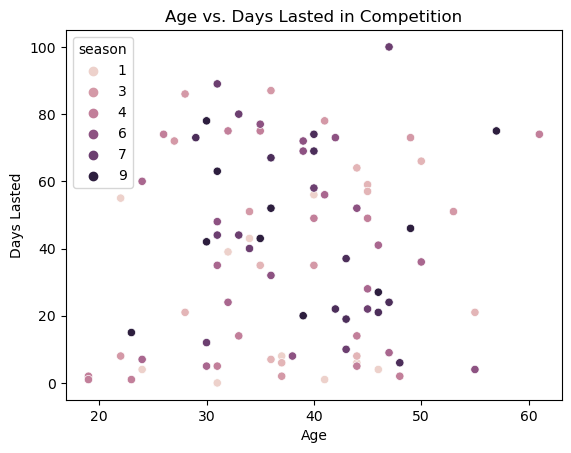

In [57]:
sns.scatterplot(x='age', y='days_lasted', data=df_survivalists_clean,hue='season')
plt.xlabel('Age')
plt.ylabel('Days Lasted')
plt.title('Age vs. Days Lasted in Competition')
plt.show()

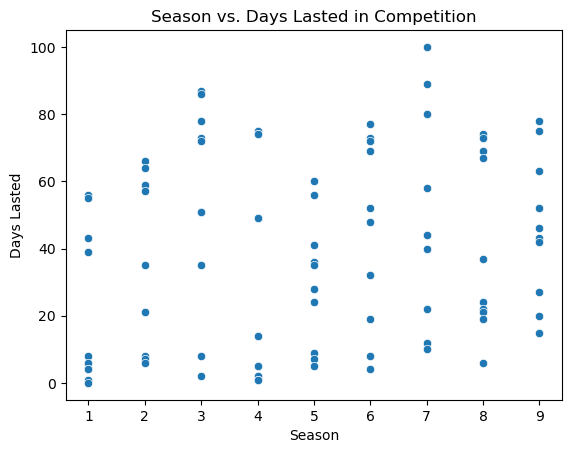

In [58]:
sns.scatterplot(x='season', y='days_lasted', data=df_survivalists_clean)
plt.xlabel('Season')
plt.ylabel('Days Lasted')
plt.title('Season vs. Days Lasted in Competition')
plt.show()

In [59]:
# Getting unique professions to categorize and map them using a dictionary
df_survivalists_clean['profession'].unique() 

array(['Corrections Officer', 'Outdoor Gear Retailer', 'Butcher',
       'Survivalist and Wildlife Therapist/Natural Healing', 'Carpenter',
       'US Army Guard and Former US Coast Guard', 'Research Assistant',
       'Author', 'Law Enforcement', 'Writer and Former Missionary',
       'Electrician', 'Aboriginal Skills Instructor', 'Anthropologist',
       'Former US Sniper', 'Survival Instructor', 'Survivial Instructor',
       'Law Enforcement and Former Air Force',
       'Former Wildland Firefighter', 'Former US Army', 'Boat builder',
       'Homesteader & Carpenter', 'Biologist & Forrester',
       'Bushcraft Instructor', 'Herbalist', 'Drywaller', 'Trapper',
       'Accountant', 'Wilderness Skills Instructor',
       'High School Teacher', 'Freelance Writer',
       'Adventure Videographer', 'Retired Shipping Driver',
       'Environmental Scientist', 'Outdoor Educator', 'Builder',
       'Psychotherapist', 'Industrial Project Manager', 'Fisherman',
       'Retired Green Beret', '

In [60]:
# Creating the dictionary for profession categories 
profession_mapping = {
    'Corrections Officer': 'Military & Law Enforcement',
    'Outdoor Gear Retailer': 'Trade & Retail',
    'Butcher': 'Trade & Retail',
    'Survivalist and Wildlife Therapist/Natural Healing': 'Outdoor & Wilderness',
    'Carpenter': 'Construction & Manual Trades',
    'US Army Guard and Former US Coast Guard': 'Military & Law Enforcement',
    'Research Assistant': 'Science & Research',
    'Author': 'Arts & Media',
    'Law Enforcement': 'Military & Law Enforcement',
    'Writer and Former Missionary': 'Arts & Media',
    'Electrician': 'Construction & Manual Trades',
    'Aboriginal Skills Instructor': 'Outdoor & Wilderness',
    'Anthropologist': 'Science & Research',
    'Former US Sniper': 'Military & Law Enforcement',
    'Survival Instructor': 'Outdoor & Wilderness',
    'Survivial Instructor': 'Outdoor & Wilderness',  # typo meant 'Survival Instructor'
    'Law Enforcement and Former Air Force': 'Military & Law Enforcement',
    'Former Wildland Firefighter': 'Emergency Services',
    'Former US Army': 'Military & Law Enforcement',
    'Boat builder': 'Construction & Manual Trades',
    'Homesteader & Carpenter': 'Construction & Manual Trades',
    'Biologist & Forrester': 'Science & Research',
    'Bushcraft Instructor': 'Outdoor & Wilderness',
    'Herbalist': 'Health & Wellness',
    'Drywaller': 'Construction & Manual Trades',
    'Trapper': 'Outdoor & Wilderness',
    'Accountant': 'Business & Finance',
    'Wilderness Skills Instructor': 'Outdoor & Wilderness',
    'High School Teacher': 'Education',
    'Freelance Writer': 'Arts & Media',
    'Adventure Videographer': 'Arts & Media',
    'Retired Shipping Driver': 'Trade & Retail',
    'Environmental Scientist': 'Science & Research',
    'Outdoor Educator': 'Outdoor & Wilderness',
    'Builder': 'Construction & Manual Trades',
    'Psychotherapist': 'Health & Wellness',
    'Industrial Project Manager': 'Management & Operations',
    'Fisherman': 'Outdoor & Wilderness',
    'Retired Green Beret': 'Military & Law Enforcement',
    'Construction Foreman': 'Construction & Manual Trades',
    'Equipment Operator': 'Construction & Manual Trades',
    'Blacksmith': 'Craftsmanship',
    'Wilderness Living Skills Instructor': 'Outdoor & Wilderness',
    'Construction': 'Construction & Manual Trades',
    'Ancestral Skills Teacher': 'Outdoor & Wilderness',
    'Disaster Preparedness Instructor': 'Emergency Services',
    'Self Defense Instructor': 'Health & Wellness',
    'Wilderness Guide': 'Outdoor & Wilderness',
    'Homesteader': 'Agriculture',
    'SERE Specialist': 'Military & Law Enforcement',
    'Search and Rescue K9 Handler': 'Emergency Services',
    'Primitive Technology Instructor': 'Outdoor & Wilderness',
    'Hunting Guide': 'Outdoor & Wilderness',
    'Ancestral Living Skills Instructor': 'Outdoor & Wilderness',
    'Winter Wilderness Expedition Operator': 'Outdoor & Wilderness',
    'Primitive Skills Instructor': 'Outdoor & Wilderness',
    'Sniper & Survival Skills Instructor': 'Military & Law Enforcement',
    'Biologist': 'Science & Research',
    'Primitive Skills School Owner': 'Outdoor & Wilderness',
    'Traditional Bowyer': 'Craftsmanship',
    'Tool Maker': 'Craftsmanship',
    'Professional Bowyer & Hunter': 'Outdoor & Wilderness',
    'Construction Laborer/Lead Singer': 'Construction & Manual Trades',
    'Prehistoric Leather Specialist': 'Craftsmanship',
    'Homesteader & Educator': 'Agriculture',
    'Retail Sporting Goods Owner': 'Trade & Retail',
    'Retired Military/Homesteader': 'Military & Law Enforcement',
    'Wilderness Survival Instructor': 'Outdoor & Wilderness',
    'Educational Consultant': 'Education',
    'Oil Rig Roughneck': 'Construction & Manual Trades',
    'Outdoor Professional': 'Outdoor & Wilderness',
    'Wilderness/Primitive Skills Instructor': 'Outdoor & Wilderness',
    'Physician': 'Health & Wellness',
    'Alpaca Shearer, Treehouse builder': 'Construction & Manual Trades',
    'Prescribed Fire Practitioner, Regenerative Agriculturalist, Leatherworker': 'Agriculture',
    'Commercial Fisherman': 'Outdoor & Wilderness',
    'Hunting and Packgoat Guide': 'Outdoor & Wilderness',
    'Community Leadership': 'Management & Operations',
    'Wilderness Expedition Guide': 'Outdoor & Wilderness'    
}



In [61]:
# Mapping the pofession categories to the dataframe 
df_survivalists_clean['profession_category'] = df_survivalists_clean['profession'].map(profession_mapping)

In [62]:
# Verifying Categories 
df_survivalists_clean['profession_category'].unique()

array(['Military & Law Enforcement', 'Trade & Retail',
       'Outdoor & Wilderness', 'Construction & Manual Trades',
       'Science & Research', 'Arts & Media', 'Emergency Services',
       'Health & Wellness', 'Business & Finance', 'Education',
       'Management & Operations', 'Craftsmanship', nan, 'Agriculture'],
      dtype=object)

In [63]:
# Using groupby and aggregation to get mean, median and standard deviation using the profession categories and days lasted as the parameters 
profession_category_stats = df_survivalists_clean.groupby('profession_category')['days_lasted'].agg(['mean', 'median', 'std']).reset_index()
print(profession_category_stats)

             profession_category       mean  median        std
0                    Agriculture  45.000000    45.5  18.493242
1                   Arts & Media  54.250000    70.5  35.752622
2             Business & Finance  45.500000    45.5  14.849242
3   Construction & Manual Trades  39.125000    45.0  32.376689
4                  Craftsmanship  16.666667     8.5  26.035873
5                      Education  11.500000    11.5  13.435029
6             Emergency Services  32.666667    19.0  34.588052
7              Health & Wellness  54.500000    66.0  27.258026
8        Management & Operations  17.000000    17.0   4.242641
9     Military & Law Enforcement  21.600000    16.0  19.414771
10          Outdoor & Wilderness  44.419355    42.0  27.095847
11            Science & Research  51.400000    57.0  29.795973
12                Trade & Retail  52.250000    49.0  16.317169


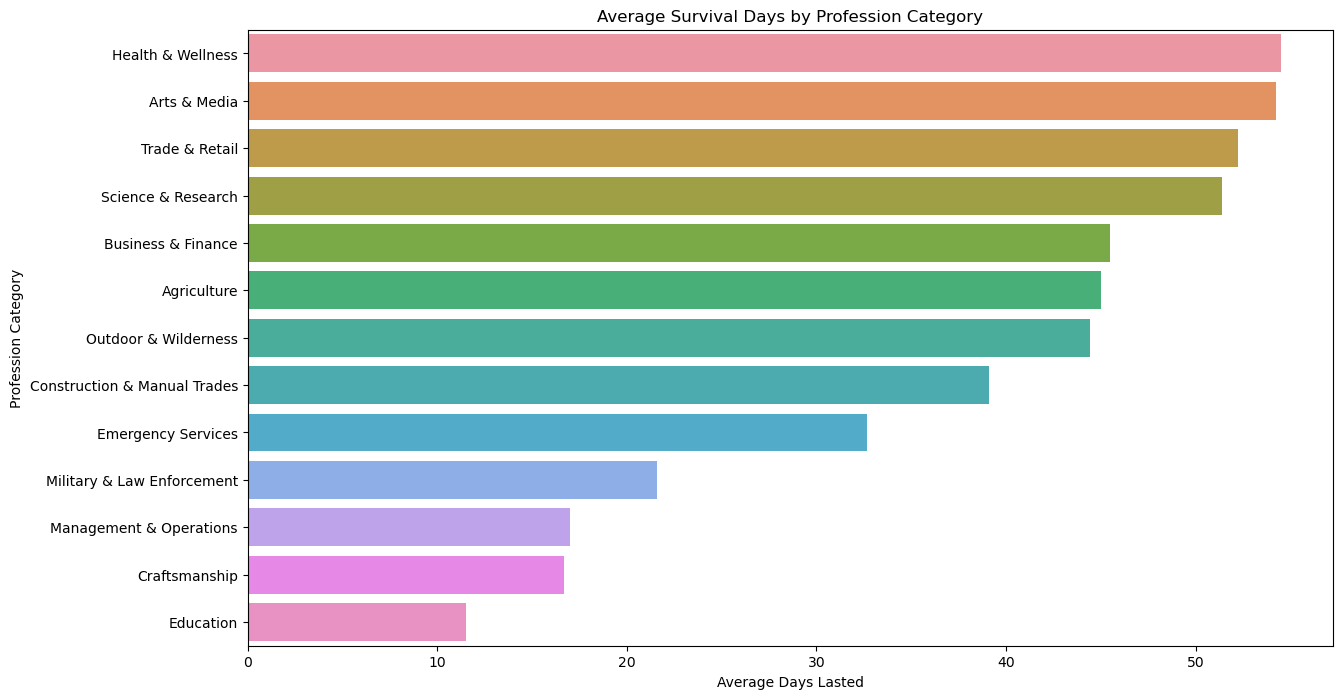

In [64]:
# Plotting a barchart to visualize the mean values
plt.figure(figsize=(14, 8))
sns.barplot(x='mean', y='profession_category', data=profession_category_stats.sort_values('mean', ascending=False))
plt.title('Average Survival Days by Profession Category')
plt.xlabel('Average Days Lasted')
plt.ylabel('Profession Category')
plt.show()

In [65]:
calculate_survival_statistics(df_survivalists_clean,'days_lasted')

Average Duration: 39.04255319148936
Median Duration: 39.5
Standard Deviation of Survival Duration: 27.849408747847182


In [66]:
def calculate_avg_survival_by_item(df, item_column, days_lasted_column):
    """
    Calculates the average survival days for each item in a DataFrame.
    
    Parameters:
    - df: Pandas DataFrame containing the data.
    - item_column: String, the name of the column containing the items.
    - days_lasted_column: String, the name of the column containing the survival days.
    
    Returns:
    - A DataFrame with each item and its corresponding average survival days.
    """
    # Group by the item column and calculate the mean of the survival days
    item_avg_survival = df.groupby('item')['days_lasted'].mean().reset_index(name='Average Survival Days')
    
    # Sort the results for better readability
    item_avg_survival_sorted = item_avg_survival.sort_values('Average Survival Days', ascending=False)
    
    return item_avg_survival_sorted


In [67]:
avg_item_survival = calculate_avg_survival_by_item(df_armed,'item','days_lasted').round()
avg_item_survival

,item,Average Survival Days
22,Slingshot,50.0
23,Soap,49.0
25,Trapping wire,49.0
6,Frying pan,46.0
12,Paracord,43.0
9,Hammock,43.0
11,Multitool,42.0
7,Gillnet,41.0
2,Bow and arrows,40.0
4,Ferro rod,40.0


In [68]:
# Sort items with the highest average survival days first
item_survival_stats_sorted = avg_item_survival.sort_values('Average Survival Days', ascending=False)

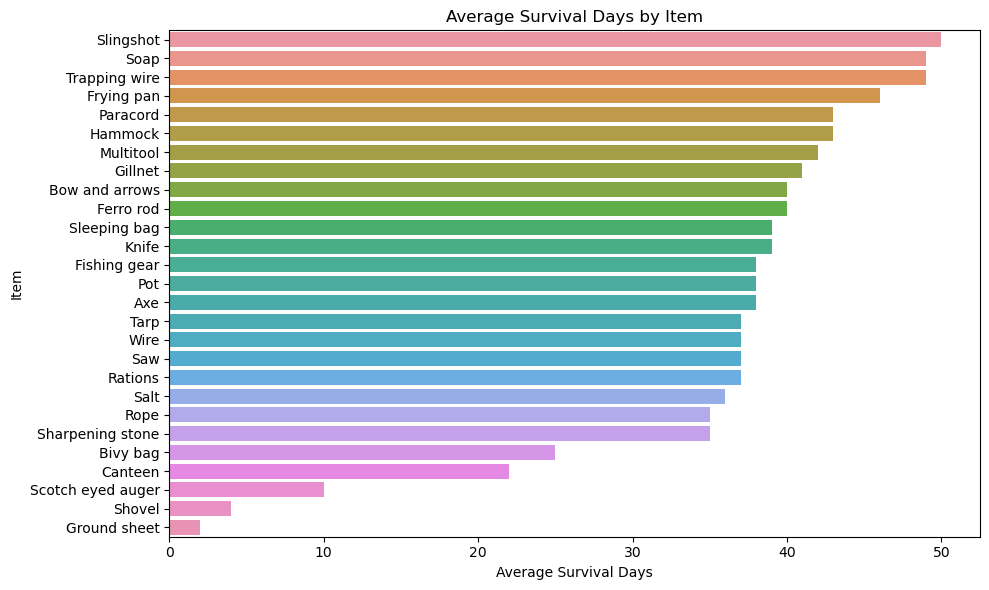

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Average Survival Days', 
    y='item', 
    data=item_survival_stats_sorted
)
plt.title('Average Survival Days by Item')
plt.xlabel('Average Survival Days')
plt.ylabel('Item')
plt.tight_layout()
plt.show()


In [70]:
def calculate_item_survival_stats(df, item_column, days_lasted_column):
    """
    Calculates the mean, median, and standard deviation of survival days for each item in a DataFrame.
    
    Parameters:
    - df: Pandas DataFrame containing the data.
    - item_column: String, the name of the column containing the items.
    - days_lasted_column: String, the name of the column containing the survival days.
    
    Returns:
    - A DataFrame with each item and its corresponding mean, median, and standard deviation of survival days.
    """
    
    # Group by the item column and calculate mean, median, and standard deviation of the survival days
    item_stats = df.groupby('item')['days_lasted'].agg(
        Mean='mean',
        Median='median',
        StdDev='std'
    ).reset_index()
    
    # Sort the results by mean survival days for better readability
    item_stats_sorted = item_stats.sort_values('Mean', ascending=False)
    
    return item_stats_sorted

In [71]:
calculate_item_survival_stats(df_armed,'item','days_lasted')

,item,Mean,Median,StdDev
22,Slingshot,50.000000,55.0,39.736633
23,Soap,49.000000,49.0,0.000000
25,Trapping wire,48.652174,45.0,24.383252
6,Frying pan,45.666667,49.0,23.415095
12,Paracord,43.196429,45.0,28.900720
9,Hammock,43.000000,43.0,11.313708
11,Multitool,42.043478,41.0,27.337363
7,Gillnet,40.812500,41.5,31.091372
2,Bow and arrows,40.466667,38.5,28.264169
4,Ferro rod,39.857143,40.0,27.018860


In [72]:
one_hot_encoded_items = pd.get_dummies(df_armed, columns=['item'])

print(one_hot_encoded_items)

     season              name  age gender  result  days_lasted  \
0         1          Alan Kay   40   Male       1           56   
1         1          Alan Kay   40   Male       1           56   
2         1          Alan Kay   40   Male       1           56   
3         1          Alan Kay   40   Male       1           56   
4         1          Alan Kay   40   Male       1           56   
..      ...               ...  ...    ...     ...          ...   
935       9  Jacques Turcotte   23   Male      10           15   
936       9  Jacques Turcotte   23   Male      10           15   
937       9  Jacques Turcotte   23   Male      10           15   
938       9  Jacques Turcotte   23   Male      10           15   
939       9  Jacques Turcotte   23   Male      10           15   

     medically_evacuated  reason_tapped_out                   profession  \
0                  False                             Corrections Officer   
1                  False                             Co

In [73]:
contestant_items = one_hot_encoded_items.groupby('name').max().reset_index()

print(contestant_items)

                name  season  age  gender  result  days_lasted  \
0         Adam Riley       9   36    Male       4           52   
1           Alan Kay       1   40    Male       1           56   
2         Alex Ribar       4   48    Male       6            2   
3     Amos Rodriguez       7   40    Male       4           58   
4      Barry Karcher       6   39    Male       4           69   
..               ...     ...  ...     ...     ...          ...   
79      Tracy Wilson       2   44  Female       8            8   
80     Wayne Russell       1   46    Male       7            4   
81  Woniya Thibeault       6   42  Female       2           73   
82    Zachary Fowler       3   36    Male       1           87   
83     Zachary Gault       3   22    Male       9            8   

    medically_evacuated           reason_tapped_out  \
0                 False                  Starvation   
1                 False                               
2                 False  Were not mentally

In [74]:
analysis_df = pd.merge(df_survivalists_clean[['name', 'days_lasted']], contestant_items, on='name')

In [75]:
analysis_df.columns

Index(['name', 'days_lasted_x', 'season', 'age', 'gender', 'result',
       'days_lasted_y', 'medically_evacuated', 'reason_tapped_out',
       'profession', 'item_number', 'item_detailed', 'item_Axe',
       'item_Bivy bag', 'item_Bow and arrows', 'item_Canteen',
       'item_Ferro rod', 'item_Fishing gear', 'item_Frying pan',
       'item_Gillnet', 'item_Ground sheet', 'item_Hammock', 'item_Knife',
       'item_Multitool', 'item_Paracord', 'item_Pot', 'item_Rations',
       'item_Rope', 'item_Salt', 'item_Saw', 'item_Scotch eyed auger',
       'item_Sharpening stone', 'item_Shovel', 'item_Sleeping bag',
       'item_Slingshot', 'item_Soap', 'item_Tarp', 'item_Trapping wire',
       'item_Wire'],
      dtype='object')

In [76]:
analysis_df.rename(columns=lambda x: x.replace('item_', ''), inplace=True)
analysis_df.columns

Index(['name', 'days_lasted_x', 'season', 'age', 'gender', 'result',
       'days_lasted_y', 'medically_evacuated', 'reason_tapped_out',
       'profession', 'number', 'detailed', 'Axe', 'Bivy bag', 'Bow and arrows',
       'Canteen', 'Ferro rod', 'Fishing gear', 'Frying pan', 'Gillnet',
       'Ground sheet', 'Hammock', 'Knife', 'Multitool', 'Paracord', 'Pot',
       'Rations', 'Rope', 'Salt', 'Saw', 'Scotch eyed auger',
       'Sharpening stone', 'Shovel', 'Sleeping bag', 'Slingshot', 'Soap',
       'Tarp', 'Trapping wire', 'Wire'],
      dtype='object')

In [77]:
def clean_data(analysis_df):
    # Drop column: 'age'
    analysis_df = analysis_df.drop(columns=['age'])
    # Drop column: 'gender'
    analysis_df = analysis_df.drop(columns=['gender'])
    # Drop column: 'season'
    analysis_df = analysis_df.drop(columns=['season'])
    # Drop column: 'medically_evacuated'
    analysis_df = analysis_df.drop(columns=['medically_evacuated'])
    # Drop column: 'reason_tapped_out'
    analysis_df = analysis_df.drop(columns=['reason_tapped_out'])
    # Drop column: 'days_lasted_y'
    analysis_df = analysis_df.drop(columns=['days_lasted_y'])
    # Drop column: 'profession'
    analysis_df = analysis_df.drop(columns=['profession'])
    # Rename column 'days_lasted_x' to 'days_lasted'
    analysis_df = analysis_df.rename(columns={'days_lasted_x': 'days_lasted'})
    # Drop column: 'result'
    analysis_df = analysis_df.drop(columns=['result'])
    # Drop column: 'detailed'
    analysis_df= analysis_df.drop(columns=['detailed'])
    # Drop column: 'number'
    analysis_df = analysis_df.drop(columns=['number'])
    return analysis_df

analysis_df_clean = clean_data(analysis_df.copy())
analysis_df_clean.head()

,name,days_lasted,Axe,Bivy bag,Bow and arrows,Canteen,Ferro rod,Fishing gear,Frying pan,Gillnet,...,Saw,Scotch eyed auger,Sharpening stone,Shovel,Sleeping bag,Slingshot,Soap,Tarp,Trapping wire,Wire
0,Alan Kay,56,True,False,False,True,True,True,False,True,...,True,False,False,False,True,False,False,False,False,True
1,Sam Larson,55,True,False,True,False,True,True,False,False,...,True,False,False,False,True,True,False,True,True,False
2,Sam Larson,60,True,False,True,False,True,True,False,False,...,True,False,False,False,True,True,False,True,True,False
3,Mitch Mitchell,43,True,True,True,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
4,Lucas Miller,39,True,False,False,False,True,True,False,False,...,True,False,False,False,True,False,False,True,False,False


In [78]:
def analyze_item_effect(analysis_df_clean):
    """
    Prompts user for an item name, then calculates and prints the survival statistics
    for contestants with and without the specified item.
    
    Parameters:
    - analysis_df_clean: DataFrame with one-hot encoded items and a 'days_lasted' column.
    """
    item_name = input("Enter the item name to analyze: ")
    
    # Check if the item exists in the DataFrame columns
    if item_name in analysis_df_clean.columns:
        # Select rows where contestants have and don't have the item
        with_item = analysis_df_clean[analysis_df_clean[item_name] == 1]['days_lasted']
        without_item = analysis_df_clean[analysis_df_clean[item_name] == 0]['days_lasted']
        
        # Calculate statistics
        mean_with = with_item.mean()
        median_with = with_item.median()
        std_with = with_item.std()
        n_with = with_item.count()
        
        mean_without = without_item.mean()
        median_without = without_item.median()
        std_without = without_item.std()
        n_without = without_item.count()
        
        # Print results
        print(f"\nStatistics for contestants WITH {item_name}:")
        print(f"Mean survival days: {mean_with}")
        print(f"Median survival days: {median_with}")
        print(f"Standard deviation: {std_with}")
        print(f"Sample size: {n_with}")
        
        print(f"\nStatistics for contestants WITHOUT {item_name}:")
        print(f"Mean survival days: {mean_without}")
        print(f"Median survival days: {median_without}")
        print(f"Standard deviation: {std_without}")
        print(f"Sample size: {n_without}")
        
    else:
        print(f"Item '{item_name}' not found in the dataset.")


In [79]:
analysis_df_clean.columns

Index(['name', 'days_lasted', 'Axe', 'Bivy bag', 'Bow and arrows', 'Canteen',
       'Ferro rod', 'Fishing gear', 'Frying pan', 'Gillnet', 'Ground sheet',
       'Hammock', 'Knife', 'Multitool', 'Paracord', 'Pot', 'Rations', 'Rope',
       'Salt', 'Saw', 'Scotch eyed auger', 'Sharpening stone', 'Shovel',
       'Sleeping bag', 'Slingshot', 'Soap', 'Tarp', 'Trapping wire', 'Wire'],
      dtype='object')

In [80]:
analyze_item_effect(analysis_df_clean)


Statistics for contestants WITH Slingshot:
Mean survival days: 52.5
Median survival days: 57.5
Standard deviation: 32.82783371876169
Sample size: 4

Statistics for contestants WITHOUT Slingshot:
Mean survival days: 38.44444444444444
Median survival days: 38.0
Standard deviation: 27.6698477481715
Sample size: 90


In [81]:
def list_item_correlations(analysis_df_clean, days_lasted_column):
    """
    Lists Pearson correlation coefficients between the presence of each item and survival days.
    
    Parameters:
    - analysis_df_clean: DataFrame with one-hot encoded items and a 'days_lasted' column.
    - days_lasted_column: String, the name of the column containing survival days.
    
    Returns:
    - A DataFrame with each item and its Pearson correlation coefficient with survival days.
    """
    # Initialize a list to store correlation results
    correlations = []
    
    # List of item columns, excluding known non-item columns
    item_columns = [col for col in analysis_df_clean.columns if col not in [days_lasted_column,'name']]
    
    # Iterate through each item column and calculate its correlation with survival days
    for item in item_columns:
        correlation = analysis_df_clean[[days_lasted_column, item]].corr().iloc[0, 1]
        correlations.append((item, correlation))
    
    # Convert the list of tuples into a DataFrame for easy viewing and analysis
    correlation_df = pd.DataFrame(correlations, columns=['Item', 'Correlation'])
    
    # Sort the DataFrame by correlation for better readability
    correlation_df_sorted = correlation_df.sort_values('Correlation', ascending=False).reset_index(drop=True)
    
    return correlation_df_sorted

# Example usage
# Ensure your DataFrame analysis_df_clean and the 'days_lasted' column name are correctly specified
correlation_results = list_item_correlations(analysis_df_clean, 'days_lasted')
print(correlation_results)


                 Item  Correlation
0       Trapping wire     0.349066
1            Paracord     0.195400
2           Multitool     0.128434
3           Slingshot     0.102418
4      Bow and arrows     0.063977
5             Gillnet     0.031388
6             Hammock     0.021064
7                Soap     0.019385
8                Wire     0.013326
9           Ferro rod     0.000643
10       Sleeping bag    -0.007331
11               Salt    -0.013533
12               Rope    -0.015133
13   Sharpening stone    -0.032669
14         Frying pan    -0.051403
15                Saw    -0.077982
16            Rations    -0.078556
17              Knife    -0.081512
18                Pot    -0.090258
19           Bivy bag    -0.104298
20               Tarp    -0.105373
21  Scotch eyed auger    -0.108718
22                Axe    -0.129667
23             Shovel    -0.131178
24       Fishing gear    -0.139553
25       Ground sheet    -0.197164
26            Canteen    -0.269836
